In [2]:
#Problem A 1 a
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters for the model and simulation
r = 0.003
I_values = np.arange(2.5, 3.5, 0.005)
initial_conditions = [-1.0, 2.0, 0.5]
t_span = [0, 1500]
dt = 0.005
t_eval = np.arange(0, 1500, dt)


In [3]:
def hindmarsh_rose(t, y, I, r):
    x, y, z = y
    dxdt = y - x**3 + 3*x**2 - z + I
    dydt = 1 - 5*x**2 - y
    dzdt = r * (4*(x + 1.6) - z)
    return [dxdt, dydt, dzdt]


In [6]:
def get_spikes(t, x, threshold=1.0):
    # Detect crossings from below to above threshold
    indices = np.where((x[:-1] < threshold) & (x[1:] >= threshold))[0]
    return t[indices + 1]

all_isis = []
all_Is = []

for I in I_values:
    sol = solve_ivp(hindmarsh_rose, t_span, initial_conditions, args=(I, r), t_eval=t_eval, method='RK45')
    spikes = get_spikes(sol.t, sol.y[0])
    if len(spikes) > 1:
        isis = np.diff(spikes)
        log_isis = np.log(isis)
        all_isis.extend(log_isis)
        all_Is.extend([I] * len(log_isis))


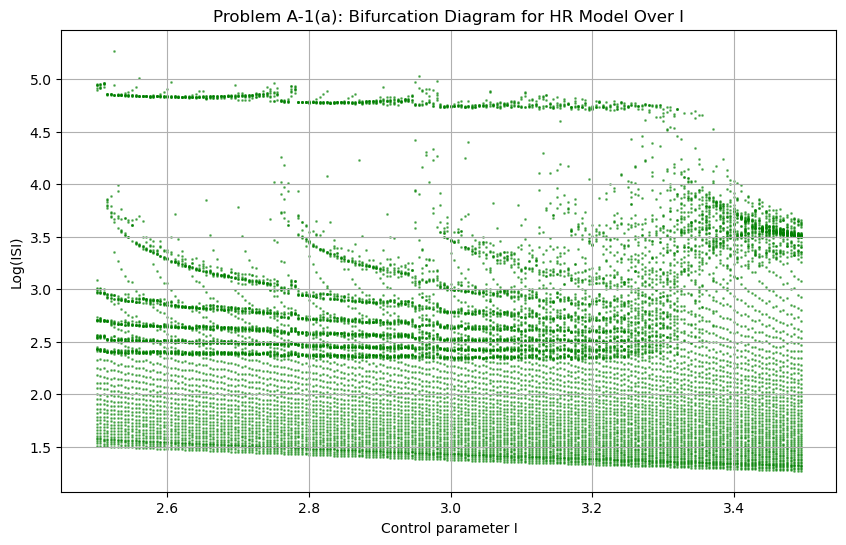

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(all_Is, all_isis, color='green', s=1, alpha=0.5)
plt.xlabel('Control parameter I')
plt.ylabel('Log(ISI)')
plt.title('Problem A-1(a): Bifurcation Diagram for HR Model Over I')
plt.grid(True)
plt.savefig('Prob-A-1a.png')
plt.show()
